# Mini-Project: Football

In [1]:
import numpy as np 
import pandas as pd 
import os

for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

/kaggle/input/international-football-results-from-1872-to-2017/results.csv


In [3]:
# Load data into Pandas Dataframe
football = pd.read_csv('/kaggle/input/international-football-results-from-1872-to-2017/results.csv')
football

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,1872-11-30,Scotland,England,0,0,Friendly,Glasgow,Scotland,False
1,1873-03-08,England,Scotland,4,2,Friendly,London,England,False
2,1874-03-07,Scotland,England,2,1,Friendly,Glasgow,Scotland,False
3,1875-03-06,England,Scotland,2,2,Friendly,London,England,False
4,1876-03-04,Scotland,England,3,0,Friendly,Glasgow,Scotland,False
...,...,...,...,...,...,...,...,...,...
41581,2020-01-10,Barbados,Canada,1,4,Friendly,Irvine,United States,True
41582,2020-01-12,Kosovo,Sweden,0,1,Friendly,Doha,Qatar,True
41583,2020-01-15,Canada,Iceland,0,1,Friendly,Irvine,United States,True
41584,2020-01-19,El Salvador,Iceland,0,1,Friendly,Carson,United States,True


In [6]:
#checking missing values
football.isnull()

,date,home_team,away_team,home_score,away_score,tournament,city,country,neutral
0,False,False,False,False,False,False,False,False,False
1,False,False,False,False,False,False,False,False,False
2,False,False,False,False,False,False,False,False,False
3,False,False,False,False,False,False,False,False,False
4,False,False,False,False,False,False,False,False,False
...,...,...,...,...,...,...,...,...,...
41581,False,False,False,False,False,False,False,False,False
41582,False,False,False,False,False,False,False,False,False
41583,False,False,False,False,False,False,False,False,False
41584,False,False,False,False,False,False,False,False,False


In [7]:
football.isnull().sum(axis = 0)

date          0
home_team     0
away_team     0
home_score    0
away_score    0
tournament    0
city          0
country       0
neutral       0
dtype: int64

In [8]:
#Step 3
#how many tuple are there
football.shape

(41586, 9)

In [9]:
#How many unique tournaments are there in the dataset?
unique_tournaments = football["tournament"].unique()
print(unique_tournaments)

['Friendly' 'British Championship' 'Copa Lipton' 'Copa Newton'
 'Copa Premio Honor Argentino' 'Copa Premio Honor Uruguayo' 'Copa Roca'
 'Copa América' 'Copa Chevallier Boutell' 'Nordic Championship'
 'International Cup' 'Baltic Cup' 'Balkan Cup' 'FIFA World Cup'
 'Copa Rio Branco' 'FIFA World Cup qualification' 'CCCF Championship'
 'NAFU Championship' 'Copa Oswaldo Cruz' 'Pan American Championship'
 'Copa del Pacífico' "Copa Bernardo O'Higgins"
 'AFC Asian Cup qualification' 'Atlantic Cup' 'AFC Asian Cup'
 'African Cup of Nations' 'Copa Paz del Chaco' 'Merdeka Tournament'
 'UEFA Euro qualification' 'UEFA Euro' 'Windward Islands Tournament'
 'African Cup of Nations qualification' 'Vietnam Independence Cup'
 'Copa Carlos Dittborn' 'CONCACAF Championship' 'Copa Juan Pinto Durán'
 'UAFA Cup' 'South Pacific Games' 'CONCACAF Championship qualification'
 'Copa Artigas' 'GaNEFo' "King's Cup" 'Gulf Cup' 'Indonesia Tournament'
 'Korea Cup' 'Brazil Independence Cup' 'Copa Ramón Castilla'
 'Oceani

In [10]:
len(unique_tournaments)

112

In [12]:
#Convert the column date to timestamps
pd.to_datetime(football.date)

0       1872-11-30
1       1873-03-08
2       1874-03-07
3       1875-03-06
4       1876-03-04
           ...    
41581   2020-01-10
41582   2020-01-12
41583   2020-01-15
41584   2020-01-19
41585   2020-02-01
Name: date, Length: 41586, dtype: datetime64[ns]

In [49]:
#Find out how many matches in the dataset were played in 2018.
football['year'] = pd.DatetimeIndex(football['date']).year
football.loc[football['year'] == 2018].shape[0]


905

In [61]:
#Calculate how many times the home team won, lost or had a draw
#Win
win = football.loc[football['home_score'] > football['away_score'] ].shape[0]
win

20234

In [62]:
#Lost
lost = football.loc[football['home_score'] < football['away_score'] ].shape[0]
lost

11774

In [63]:
#Draw
draw = football.loc[football['home_score'] == football['away_score'] ].shape[0]
draw

9578

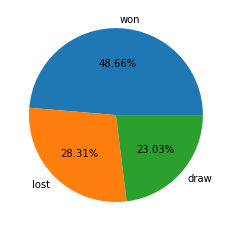

In [68]:
#Visualizzation
#Pie Chart

import matplotlib.pyplot as plt



# create figure and axis
#figure, axis = plt.subplots()
games = [ win, lost, draw]
labels =['won', 'lost', 'draw']
plt.pie(games, labels = labels,  autopct='%1.2f%%')
plt.show()

In [79]:
#Plot the neutral column as a pie chart
unique_labels = football["neutral"].unique()
print(unique_labels)

[False  True]


In [77]:
neutral_false = football.loc[football['neutral'] == False ].shape[0]
neutral_true =  football.loc[football['neutral'] == True ].shape[0]
neutral = [neutral_false, neutral_true]
print(neutral)

[31304, 10282]


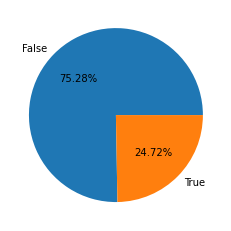

In [78]:
plt.pie(neutral, labels = unique_labels,  autopct='%1.2f%%')
plt.show()

In [92]:
#How many unique teams are there in the dataset?
values = football[["home_team", "away_team"]].values
len(np.unique(values))

312